In [3]:
import librosa as lr
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd
from AudioUtilsCustom import *




In [4]:
from compression_custom import Audiopackage
from compression_custom import AudioSegment
import time


In [43]:
# filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles'
# input_file1 = filepath + '\\Hercules_dry_Drums_Kick.wav'
# input_file2 = filepath + '\\Hercules_dry_Drums_Loop.wav'

import os
#filepath = 'data/Hercules_Dry(AbelEdit)'
filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles'
input_file1 = os.path.join(filepath, 'PlasticHeart_ drums_pyroSnare')
#input_file2 = os.path.join(filepath, 'Hercules_dry_Drums_Loop.wav')

# Read the wav file 
#samplerate1, data1 = wavfile.read(input_file1)
#samplerate2, data2 = wavfile.read(input_file2)
#print('Sampling rate = ', samplerate1)
#dt1, sr1 = lr.load(input_file1, sr = samplerate1)
#dt2, sr2 = lr.load(input_file2, sr = samplerate2)


C:\Users\chorj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


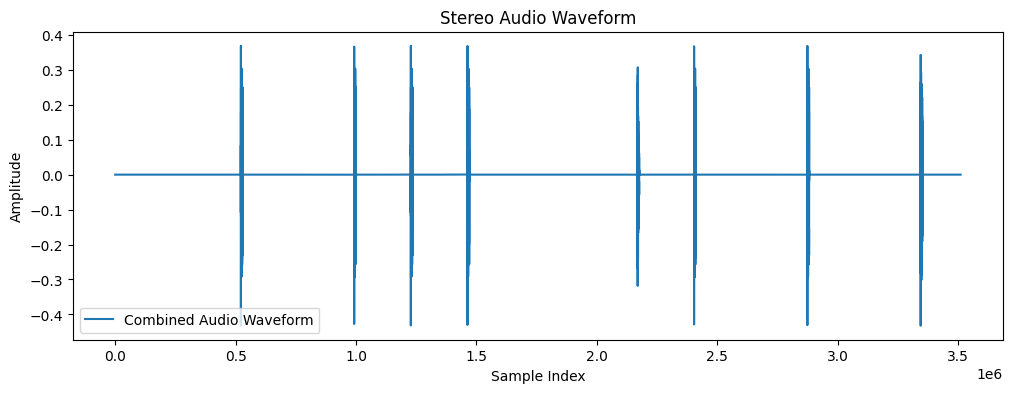

In [45]:
y1, sr1 = lr.load(input_file1 + '.wav')

plot_waveform(y1, isLibrosa=True)

In [46]:
print(y1[1000:1010])

[-2.7767896e-08 -5.6163163e-10 -5.8610494e-10  1.6636821e-09
  2.6793614e-08  5.6410396e-09 -1.8350711e-08  1.0803513e-08
 -2.1574298e-09 -4.9444253e-08]


In [6]:
# #TODO: 각 시도마다 초기화가 완전히 안 되어서 time measurement가 정확하지 않음.
# start_time = time.time()
# example = Audiopackage(input_file1, "exact")

# newtime = time.time() - start_time
# print("Seconds taken: " + str(newtime))
# start_time = time.time()
# example2 = Audiopackage(input_file2, "exact")
# newtime2 = time.time() - start_time
# print("Seconds taken: " + str(newtime2))
# start_time = time.time()
# example3 = Audiopackage(input_file1, "similar")
# newtime3 = time.time() - start_time
# print("Seconds taken: " + str(newtime3))
# start_time = time.time()
# example4 = Audiopackage(input_file2, "similar")
# newtime4 = time.time() - start_time
# print("Seconds taken: " + str(newtime4))
# start_time = time.time()
# example5 = Audiopackage(input_file1, "spectrogram")
# newtime5 = time.time() - start_time
# print("Seconds taken: " + str(newtime5))
# start_time = time.time()
# example6 = Audiopackage(input_file2, "spectrogram")
# newtime6 = time.time() - start_time
# print("Seconds taken: " + str(newtime6))

In [7]:
def purge_small_segments(segments, threshold):
    new_segments = []
    for segment in segments:
        if segment[1] - segment[0] > threshold:
            new_segments.append(segment)
    return new_segments

a = [[1,3], [2,5], [3,8], [2,2], [6,10]]

purge_small_segments(a, 2)

[[2, 5], [3, 8], [6, 10]]

In [8]:
def find_non_zero_ratio(sample):
    count = 0
    for i in range(len(sample)):
        if sample[i][0] == 0 and sample[i][1] == 0:
            count += 1
    return round(1 - count/len(sample),4)


In [9]:
import soundfile as sf
import zipfile
import os
import time

def compare_compression_ratio(input_file):
    # Specify the output file paths
    flac_output_file = 'compressed.flac'
    zip_output_file = 'compressed.zip'

    # Read the WAV file
    data, samplerate = sf.read(input_file)

    start_time = time.time()
    # Write the FLAC file
    sf.write(flac_output_file, data, samplerate, format='flac')
    # time
    flac_time = time.time() - start_time

    start_time = time.time()
    # Create a new ZIP file
    with zipfile.ZipFile(zip_output_file, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
        # Add the WAV file to the ZIP file
        zipf.write(input_file, arcname='audio.wav')
    # time
    zip_time = time.time() - start_time

    # Get the file sizes
    input_size = os.path.getsize(input_file)
    flac_size = os.path.getsize(flac_output_file)
    zip_size = os.path.getsize(zip_output_file)

    start_time = time.time()
    tryExact = Audiopackage(input_file, "exact")
    exact_time = time.time() - start_time

    start_time = time.time()
    trySimilar = Audiopackage(input_file, "similar")
    similar_time = time.time() - start_time

    start_time = time.time()
    trySpectrogram = Audiopackage(input_file, "spectrogram")
    spectrogram_time = time.time() - start_time
    
    spectrogram_ratio = trySpectrogram.compratio()
    similar_ratio = trySimilar.compratio()
    exact_ratio = tryExact.compratio()
    flac_ratio = flac_size / input_size
    zip_ratio = zip_size / input_size
    ratiofamily = [zip_ratio, flac_ratio, exact_ratio, similar_ratio, spectrogram_ratio]
    timefamily = [zip_time, flac_time, exact_time, similar_time, spectrogram_time]
    non_zero_ratio = find_non_zero_ratio(data)
    baseline = non_zero_ratio
    
    # Calculate the compression ratios
   
    # Delete the temporary files
    os.remove(flac_output_file)
    os.remove(zip_output_file)
    return [ratiofamily, timefamily, baseline]


In [ ]:
# Assuming you have a list named 'my_list'
rounded_list = [round(x, 4) for x in my_list]


In [56]:
def resultanalysis(ratiofamily, timefamily, baseline):
    print("Baseline: " + str(baseline))
    print("ZIP Compression Ratio: " + str(round(ratiofamily[0],4)))
    print("FLAC Compression Ratio: " + str(round(ratiofamily[1],4)))
    print("Exact Compression Ratio: " + str(round(ratiofamily[2],4)))
    print("Similar Compression Ratio: " + str(round(ratiofamily[3],4)))
    print("Spectrogram Compression Ratio: " + str(round(ratiofamily[4],4)))
    print("ZIP Compression Time: " + str(round(timefamily[0],4)))
    print("FLAC Compression Time: " + str(round(timefamily[1],4)))
    print("Exact Compression Time: " + str(round(timefamily[2],4)))
    print("Similar Compression Time: " + str(round(timefamily[3],4)))
    print("Spectrogram Compression Time: " + str(round(timefamily[4],4)))
    print("")

# a = compare_compression_ratio(input_file1)
# resultanalysis(a[0], a[1], a[2])

In [11]:
# a = compare_compression_ratio(input_file2)
# resultanalysis(a[0], a[1], a[2])

In [49]:
#여기부터는 개별 파일이 아닌 폴더를 대상으로 압축률을 측정하는 코드

import glob

# Specify the folder path
folder_path = 'C:\\Users\\chorj\\Downloads\\WavFiles\\Hercules_Dry(AbelEdit)'

# Find all WAV files in the folder
wav_files = glob.glob(folder_path + '/*.wav')

# Print the list of WAV files
for file in wav_files:
    print(file)


C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Bass_BassTop.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Bass_Sub.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Horns.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Low Brs.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Trombone.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Trumpet.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Choir_Men.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Choir_Women.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Drums)Crash Body.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Drums_Crash.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Drums_Kick.wav
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(

In [51]:
def analyze_folder(folder_path):
    # Find all WAV files in the folder
    wav_files = glob.glob(folder_path + '/*.wav')
    resultList = []
    print("hello")
    # Print the list of WAV files
    for file in wav_files:
        print(file)
        resultList.append(compare_compression_ratio(file))
    return resultList


In [ ]:
resultList = analyze_folder(folder_path)    

In [ ]:
resultList = resultList[0]

In [53]:
print(resultList[0][0])

[0.5792270339381653, 0.08885369785860674, 0.7055553437655662, 0.7055553437655662, 0.7055553437655662]


In [61]:
non_zero_ratio = []
flac_ratio = []
zip_ratio = []
exact_ratio = []
similar_ratio = []
spectrogram_ratio = []
flac_time_ratio = []
zip_time_ratio = []
exact_time_ratio = []
similar_time_ratio = []
spectrogram_time_ratio = []

for i in range(len(resultList)):
    print("performance of  " + str(i) + "th file:")
    print (resultanalysis(resultList[i][0], resultList[i][1], resultList[i][2]))
    non_zero_ratio.append(float(resultList[i][2]))
    flac_ratio.append(float(resultList[i][0][1]))
    zip_ratio.append(float(resultList[i][0][0]))
    exact_ratio.append(float(resultList[i][0][2]))
    similar_ratio.append(float(resultList[i][0][3]))
    spectrogram_ratio.append(float(resultList[i][0][4]))
    flac_time_ratio.append(float(resultList[i][1][1]))
    zip_time_ratio.append(float(resultList[i][1][0]))
    exact_time_ratio.append(float(resultList[i][1][2]))
    similar_time_ratio.append(float(resultList[i][1][3]))
    spectrogram_time_ratio.append(float(resultList[i][1][4]))
    



performance of  0th file:
Baseline: 0.73
ZIP Compression Ratio: 0.5792
FLAC Compression Ratio: 0.0889
Exact Compression Ratio: 0.7056
Similar Compression Ratio: 0.7056
Spectrogram Compression Ratio: 0.7056
ZIP Compression Time: 1.7626
FLAC Compression Time: 0.35
Exact Compression Time: 1.8098
Similar Compression Time: 2.0108
Spectrogram Compression Time: 1.826

None
performance of  1th file:
Baseline: 0.7873
ZIP Compression Ratio: 0.7135
FLAC Compression Ratio: 0.0577
Exact Compression Ratio: 0.7707
Similar Compression Ratio: 0.7707
Spectrogram Compression Ratio: 0.7707
ZIP Compression Time: 1.3397
FLAC Compression Time: 0.3481
Exact Compression Time: 1.4907
Similar Compression Time: 12.2301
Spectrogram Compression Time: 1.761

None
performance of  2th file:
Baseline: 0.8507
ZIP Compression Ratio: 0.752
FLAC Compression Ratio: 0.1985
Exact Compression Ratio: 0.8506
Similar Compression Ratio: 0.8506
Spectrogram Compression Ratio: 0.8506
ZIP Compression Time: 1.6825
FLAC Compression Time

In [62]:
print("Average non-zero ratio: " + str(non_zero_ratio/len(resultList)))
print("Average flac ratio: " + str(flac_ratio/len(resultList)))
print("Average zip ratio: " + str(zip_ratio/len(resultList)))

print("Zip to non-zero Compression ratio: " + str(zip_ratio/non_zero_ratio))
print("FLAC to non-zero Compression ratio: " + str(flac_ratio/non_zero_ratio))
print("Zip to FLAC Compression ratio: " + str(flac_ratio/zip_ratio))

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [72]:
"""
non_zero_ratio / 
flac_ratio zip_ratio exact_ratio
similar_ratio spectrogram_ratio = []
flac_time_ratio = []zip_time_ratio = []exact_time_ratio = []similar_time_ratio = []spectrogram_time_ratio = []
"""
modratio = [[],[],[],[],[]]
for i in range(44):
    modratio[1].append(flac_ratio[i]/non_zero_ratio[i])
    modratio[0].append(zip_ratio[i]/non_zero_ratio[i])
    modratio[2].append(exact_ratio[i]/non_zero_ratio[i])
    modratio[3].append(similar_ratio[i]/non_zero_ratio[i])
    modratio[4].append(spectrogram_ratio[i]/non_zero_ratio[i])

print("Average non-zero ratio:" + str(np.mean(non_zero_ratio)))
print("Average zip ratio: " + str(np.mean(zip_ratio)))
print("Average flac ratio: " + str(np.mean(flac_ratio)))
print("Average exact ratio: " + str(np.mean(exact_ratio)))
print("Average similar ratio: " + str(np.mean(similar_ratio)))
print("Average spectrogram ratio: " + str(np.mean(spectrogram_ratio)))
print("")
print("Average zip time: " + str(np.mean(zip_time_ratio)))
print("Average flac time: " + str(np.mean(flac_time_ratio)))
print("Average exact time: " + str(np.mean(exact_time_ratio)))
print("Average similar time: " + str(np.mean(similar_time_ratio)))
print("Average spectrogram time: " + str(np.mean(spectrogram_time_ratio)))

print("")
print("Average zip to non-zero ratio: " + str(np.mean(modratio[0])))
print("Average flac to non-zero ratio: " + str(np.mean(modratio[1])))
print("Average exact to non-zero ratio: " + str(np.mean(modratio[2])))
print("Average similar to non-zero ratio: " + str(np.mean(modratio[3])))
print("Average spectrogram to non-zero ratio: " + str(np.mean(modratio[4])))

Average non-zero ratio:0.3771931818181818
Average zip ratio: 0.3280916722656196
Average flac ratio: 0.09583450351558385
Average exact ratio: 0.34850265992257995
Average similar ratio: 0.3332794281729417
Average spectrogram ratio: 0.3312304544689967

Average zip time: 0.8938615755601362
Average flac time: 0.28962847319516266
Average exact time: 1.3733151880177585
Average similar time: 7.058599276976152
Average spectrogram time: 1.516711641441692

Average zip to non-zero ratio: 0.8778735387574342
Average flac to non-zero ratio: 0.27361604843457915
Average exact to non-zero ratio: 0.8503189765291919
Average similar to non-zero ratio: 0.7996381435968277
Average spectrogram to non-zero ratio: 0.7926238235445905


In [84]:
def showDistribution(data, name, hue = 'blue'):

    plt.hist(data, bins=10, color=hue, edgecolor='black')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + name)
    plt.show()
    print("Average " + name + ": " + str(round(np.mean(data),3)))
    print("Median " + name + ": " + str(round(np.median(data),3)))
    print("Max " + name + ": " + str(round(max(data),3)))
    print("Min " + name + ": " + str(round(min(data),3)))
    



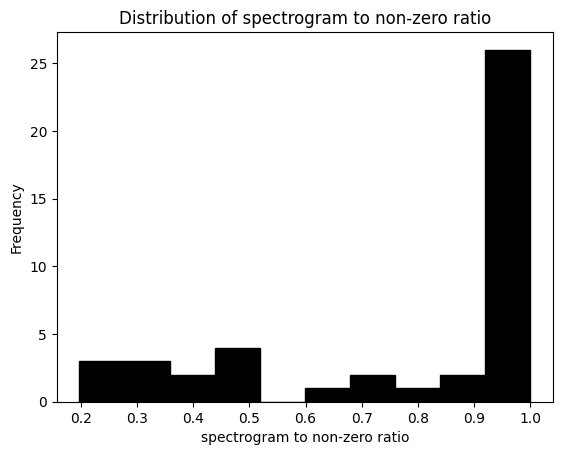

Average spectrogram to non-zero ratio: 0.793
Median spectrogram to non-zero ratio: 0.996
Max spectrogram to non-zero ratio: 1.0
Min spectrogram to non-zero ratio: 0.197


In [89]:
showDistribution(modratio[4], "spectrogram to non-zero ratio", hue = 'black')

In [117]:
def getmaxmintime(data):
    print ("")

    print("maxtime: " + str(np.max(data)/np.mean(data)))
    print("mintime: " + str(np.min(data)/np.mean(data)))
    print("max/min: " + str(np.max(data)/np.min(data)))
    print("median: " + str(np.median(data)))

getmaxmintime(flac_time_ratio)
getmaxmintime(zip_time_ratio)
getmaxmintime(exact_time_ratio)
getmaxmintime(similar_time_ratio)
getmaxmintime(spectrogram_time_ratio)




maxtime: 1.5718282290274148
mintime: 0.7024893979980152
max/min: 2.2375116742072962
median: 0.28412890434265137

maxtime: 1.9719088314349238
mintime: 0.25148946788802895
max/min: 7.840920130750287
median: 0.7793995141983032

maxtime: 2.050102803390917
mintime: 0.7778130452020413
max/min: 2.6357269475448195
median: 1.241231918334961

maxtime: 3.4589290757208517
mintime: 0.15821617416986164
max/min: 21.862044723741892
median: 2.2698798179626465

maxtime: 1.783542930096575
mintime: 0.8273188522349295
max/min: 2.1558108162028335
median: 1.4727988243103027


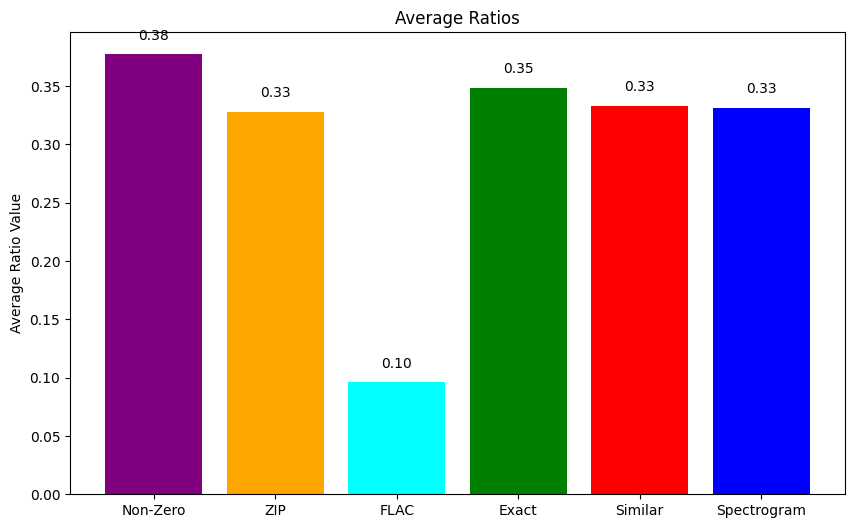

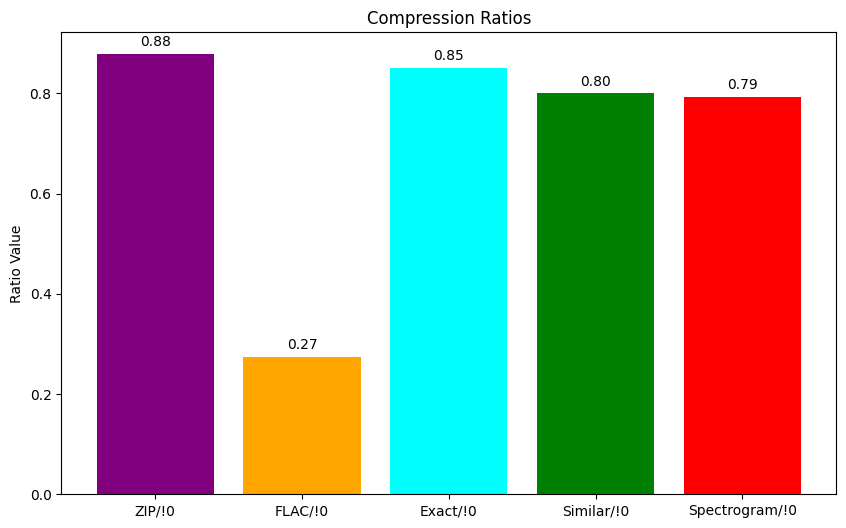

In [91]:
import matplotlib.pyplot as plt

average_ratios = [np.mean(non_zero_ratio), np.mean(zip_ratio), np.mean(flac_ratio), np.mean(exact_ratio), np.mean(similar_ratio), np.mean(spectrogram_ratio)]
compression_ratios = [np.mean(modratio[0]), np.mean(modratio[1]), np.mean(modratio[2]), np.mean(modratio[3]), np.mean(modratio[4])]

average_labels = ['Non-Zero', 'ZIP', 'FLAC', 'Exact', 'Similar', 'Spectrogram']
compression_labels = ['ZIP/!0', 'FLAC/!0', 'Exact/!0', 'Similar/!0', 'Spectrogram/!0']

# average ratios
plt.figure(figsize=(10, 6))
plt.bar(average_labels, average_ratios, color=['purple', 'orange', 'cyan', 'green', 'red', 'blue'])
plt.title('Average Ratios')
plt.ylabel('Average Ratio Value')
for i, v in enumerate(average_ratios):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# compression ratios
plt.figure(figsize=(10, 6))
plt.bar(compression_labels, compression_ratios, color=['purple', 'orange', 'cyan', 'green', 'red', 'blue'])
plt.title('Compression Ratios')
plt.ylabel('Ratio Value')
for i, v in enumerate(compression_ratios):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()



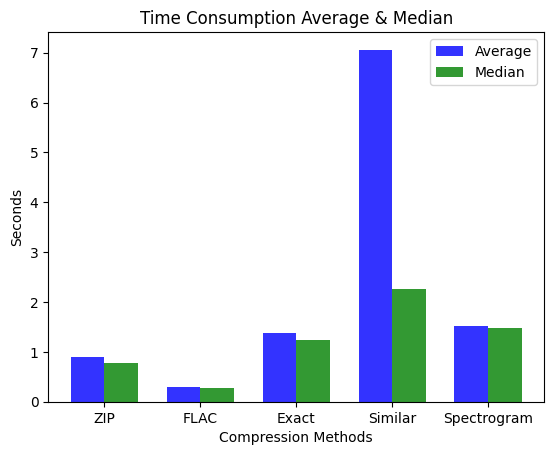

In [119]:
import matplotlib.pyplot as plt

average_ratios = [np.mean(zip_time_ratio), np.mean(flac_time_ratio), np.mean(exact_time_ratio), np.mean(similar_time_ratio), np.mean(spectrogram_time_ratio)]
median_ratios = [np.median(zip_time_ratio), np.median(flac_time_ratio), np.median(exact_time_ratio), np.median(similar_time_ratio), np.median(spectrogram_time_ratio)]


average_labels = ['ZIP', 'FLAC', 'Exact', 'Similar', 'Spectrogram']


# Number of groups
n_groups = len(average_ratios)

# Creating the bar plot
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, average_ratios, bar_width,
                alpha=opacity, color='b',
                label='Average')

rects2 = ax.bar(index + bar_width, median_ratios, bar_width,
                alpha=opacity, color='g',
                label='Median')

ax.set_xlabel('Compression Methods')
ax.set_ylabel('Seconds')
ax.set_title('Time Consumption Average & Median')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(average_labels)
ax.legend()

plt.show()



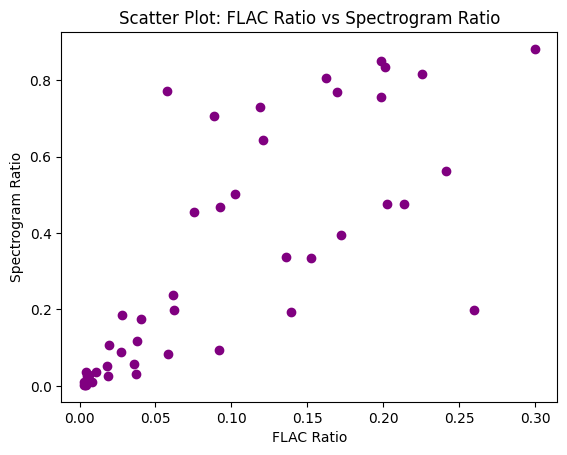

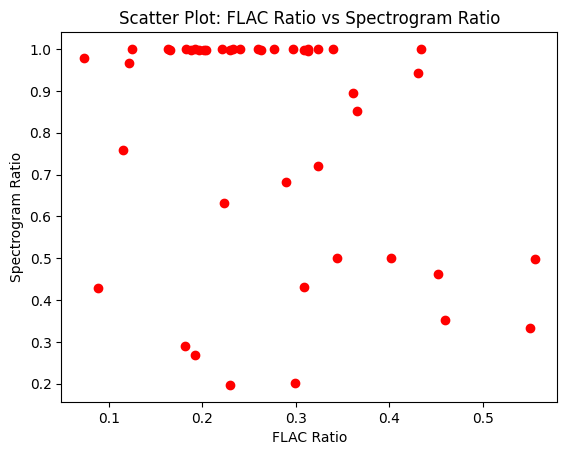

In [108]:
import matplotlib.pyplot as plt

plt.scatter(flac_ratio, spectrogram_ratio, color='purple')
plt.xlabel('FLAC Ratio')
plt.ylabel('Spectrogram Ratio')
plt.title('Scatter Plot: FLAC Ratio vs Spectrogram Ratio')
plt.show()
plt.scatter(modratio[1], modratio[4], color='red')
plt.xlabel('FLAC Ratio')
plt.ylabel('Spectrogram Ratio')
plt.title('Scatter Plot: FLAC Ratio vs Spectrogram Ratio')
plt.show()


In [ ]:
a = [1,-1,0,1]
b = [-1,1,0,-1]
get_cosine_similarity(a,b)

-1.0000000000000002